### Modeling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


- from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
df = pd.read_csv('/content/drive/Othercomputers/My Mac/Final Project/Time-Series-Forecasting/data/cleaned_05_1.csv')

- from Local Computer

In [2]:
df = pd.read_csv('/Users/leahchen/Documents/LHL/Final Project/Time-Series-Forecasting/data/cleaned_05_1.csv')

In [3]:
df.head()

,order_id,country,CreatedAt,quantity,gift_quantity,gross_revenue,profit,day_of_week,month_of_year,hour_of_day,...,payment_CARD_CSOB,payment_CHECKOUT_CARD,payment_PAYPAL_EXPRESS,payment_CHECKOUT_APPLE,payment_CHECKOUT_BANCONTACT,payment_BANK_TRANSFER,payment_CASH,payment_CSOB_CARD,payment_INVOICE_HUF,payment_PAYPAL_IDEALO
0,1900079010,Czech Republic,2019-06-01 06:26:00,3,0.0,265.519767,109.789535,5,6,6,...,0,0,0,0,0,0,0,0,0,0
1,1900079006,Czech Republic,2019-06-01 06:26:00,5,0.0,80.658914,34.230620,5,6,6,...,0,0,0,0,0,0,0,0,0,0
2,1900080490,Czech Republic,2019-06-01 11:57:00,2,0.0,228.329457,53.247287,5,6,11,...,1,0,0,0,0,0,0,0,0,0
3,1900078998,Czech Republic,2019-06-01 06:26:00,2,0.0,23.384108,11.603101,5,6,6,...,1,0,0,0,0,0,0,0,0,0
4,1900078996,Slovakia,2019-06-01 09:34:00,1,0.0,45.199763,17.174569,5,6,9,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Assuming your DataFrame is named 'df'
df1 = df.round(2)

# If you want to round specific columns, you can do it like this:
columns_to_round = ['gross_revenue','profit','average_price']
df1 = df.copy()
for col in columns_to_round:
    df1[col] = df[col].round(2)

df1.head()

,order_id,country,CreatedAt,quantity,gift_quantity,gross_revenue,profit,day_of_week,month_of_year,hour_of_day,...,payment_CARD_CSOB,payment_CHECKOUT_CARD,payment_PAYPAL_EXPRESS,payment_CHECKOUT_APPLE,payment_CHECKOUT_BANCONTACT,payment_BANK_TRANSFER,payment_CASH,payment_CSOB_CARD,payment_INVOICE_HUF,payment_PAYPAL_IDEALO
0,1900079010,Czech Republic,2019-06-01 06:26:00,3,0.0,265.52,109.79,5,6,6,...,0,0,0,0,0,0,0,0,0,0
1,1900079006,Czech Republic,2019-06-01 06:26:00,5,0.0,80.66,34.23,5,6,6,...,0,0,0,0,0,0,0,0,0,0
2,1900080490,Czech Republic,2019-06-01 11:57:00,2,0.0,228.33,53.25,5,6,11,...,1,0,0,0,0,0,0,0,0,0
3,1900078998,Czech Republic,2019-06-01 06:26:00,2,0.0,23.38,11.60,5,6,6,...,1,0,0,0,0,0,0,0,0,0
4,1900078996,Slovakia,2019-06-01 09:34:00,1,0.0,45.20,17.17,5,6,9,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Replace 'inf' values with NaN
df1['average_price'] = df1['average_price'].replace(float('inf'), np.nan)

# Recalculate the mean, excluding NaN values
mean_price = df1['average_price'].mean()

# Fill NaN values in the 'average_price' column with the new mean
df1['average_price'].fillna(mean_price, inplace=True)


In [7]:
# Check for any 'inf' values in the 'average_price' column
inf_values = (df1['average_price'] == float('inf')).any()
print('Are there any inf values in the column?', inf_values)


Are there any inf values in the column? False


- Covert date-related features as cyclical features

In [5]:
def encode_cyclical(df1, col, max_val):
    df1[col + '_sin'] = np.sin(2 * np.pi * df[col]/max_val)
    df1[col + '_cos'] = np.cos(2 * np.pi * df[col]/max_val)
    return df1

# Encode date-related features as cyclical features
df1 = encode_cyclical(df, 'day_of_week', 6)
df1 = encode_cyclical(df, 'month_of_year', 11)
df1 = encode_cyclical(df, 'hour_of_day', 23)
df1 = encode_cyclical(df, 'week_of_year', 52)

# Drop the original date-related features
df1 = df1.drop(['day_of_week', 'month_of_year', 'hour_of_day', 'year', 'week_of_year'], axis=1)

In [6]:
# Define the features (X) and the target variable (y)
X = df1.drop(columns=['gross_revenue', 'profit','average_price', 'order_id','total_sales_country_product', 'avg_sales_country_product', 'total_sales_country_product_month',
                    'avg_sales_country_product_day'])
y = df1['gross_revenue']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Define the lists of numeric, categorical, binary, and cyclical features
numeric_features = ['quantity','price_difference']
categorical_features = ['country','gift_quantity'] 
binary_features = ['morning', 'afternoon', 'evening']
cyclical_features = ['day_of_week_sin', 'day_of_week_cos', 'month_of_year_sin', 'month_of_year_cos', 
                     'hour_of_day_sin', 'hour_of_day_cos', 'week_of_year_sin', 'week_of_year_cos']

In [14]:
# Create transformers for numeric, categorical, binary, and cyclical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
binary_transformer = 'passthrough'

# Create a column transformer that applies the appropriate transformations to each feature subset
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', binary_transformer, binary_features),
        ('cyc', 'passthrough', cyclical_features)])

In [15]:
# Create a baseline model (mean of the target variable)
y_baseline = np.mean(y_train)

In [16]:
X_train.head()

,country,CreatedAt,quantity,gift_quantity,price_difference,morning,afternoon,evening,category_football,category_running,...,payment_INVOICE_HUF,payment_PAYPAL_IDEALO,day_of_week_sin,day_of_week_cos,month_of_year_sin,month_of_year_cos,hour_of_day_sin,hour_of_day_cos,week_of_year_sin,week_of_year_cos
39784,Hungary,2019-08-17 08:52:00,2,0.0,-11.82,1,0,0,1,0,...,0,0,-8.660254e-01,0.5,-0.989821,-0.142315,0.816970,-0.576680,-0.748511,-0.663123
700182,Slovakia,2021-08-22 17:25:00,4,0.0,-27.85,0,0,1,0,1,...,0,0,-2.449294e-16,1.0,-0.989821,-0.142315,-0.997669,-0.068242,-0.748511,-0.663123
164681,Spain,2020-01-21 13:40:00,4,0.0,-16.91,0,1,0,0,1,...,0,0,8.660254e-01,0.5,0.540641,0.841254,-0.398401,-0.917211,0.464723,0.885456
514491,Romania,2021-03-09 08:45:00,4,0.0,-8.17,1,0,0,1,0,...,0,0,8.660254e-01,0.5,0.989821,-0.142315,0.816970,-0.576680,0.935016,0.354605
74842,France,2019-10-10 22:10:00,2,0.0,-8.27,0,0,0,0,0,...,0,0,1.224647e-16,-1.0,-0.540641,0.841254,-0.269797,0.962917,-0.970942,0.239316


- Linear Regression Model

In [17]:
# Create a pipeline with the preprocessor and the linear regression model
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

# Train and evaluate the models
pipelines = [lr_pipeline]
model_names = ['Linear Regression']

for pipeline, model_name in zip(pipelines, model_names):
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name} Mean Squared Error: {mse}")

# Calculate the mean squared error for the baseline model
mse_baseline = mean_squared_error(y_test, [y_baseline] * len(y_test))
print(f"Baseline Model Mean Squared Error: {mse_baseline}") 


Linear Regression Mean Squared Error: 2846.026504001451
Baseline Model Mean Squared Error: 3536.537490401975


In [18]:
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred)
print("Linear Regression:")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R2:{r2_lr:.2f}")

Linear Regression:
MAE: 35.03
MSE: 2846.03
RMSE: 53.35
R2:0.20


In [19]:
# Get the Linear Regression model from the pipeline
lr_model = lr_pipeline.named_steps['regressor']

# Get the coefficients
coefficients = lr_model.coef_

# Get the preprocessor from the pipeline
preprocessor = lr_pipeline.named_steps['preprocessor']

# Transform the training data using the preprocessor
X_train_transformed = preprocessor.transform(X_train)

# Get the feature names after preprocessing
# This line assumes that the preprocessor is a ColumnTransformer
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame with feature names and their coefficients
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})

# Sort the DataFrame by the absolute value of coefficients (descending order)
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False).drop(columns=['abs_coefficient'])

# Display the coefficients
print("Coefficients:")
print(coef_df)

Coefficients:
                        feature   coefficient
25       cat__gift_quantity_2.0  3.236471e+12
24       cat__gift_quantity_1.0  3.236471e+12
26       cat__gift_quantity_3.0  3.236471e+12
23       cat__gift_quantity_0.0  3.236471e+12
11         cat__country_Hungary -5.622688e+11
17         cat__country_Romania -5.622688e+11
18        cat__country_Slovakia -5.622688e+11
15          cat__country_Poland -5.622688e+11
6   cat__country_Czech Republic -5.622688e+11
5          cat__country_Croatia -5.622688e+11
16        cat__country_Portugal -5.622688e+11
13           cat__country_Italy -5.622688e+11
20           cat__country_Spain -5.622688e+11
12         cat__country_Ireland -5.622688e+11
3          cat__country_Belgium -5.622688e+11
9           cat__country_France -5.622688e+11
14     cat__country_Netherlands -5.622688e+11
19        cat__country_Slovenia -5.622688e+11
7          cat__country_Denmark -5.622688e+11
10         cat__country_Germany -5.622688e+11
8          cat__coun

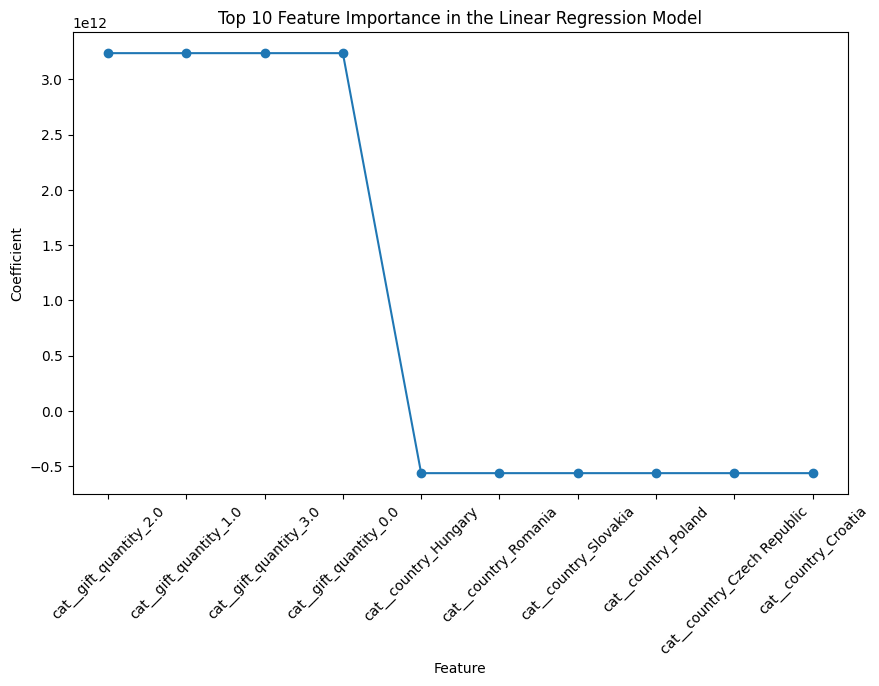

In [20]:
# Select the first 10 features
top_n = 10
coef_df_top_n = coef_df.head(top_n)

# Plot the coefficients of the top 10 features as a line graph
plt.figure(figsize=(10, 6))
plt.plot(coef_df_top_n['feature'], coef_df_top_n['coefficient'], marker='o')
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Top 10 Feature Importance in the Linear Regression Model")
plt.xticks(rotation=45)
plt.show()


- XGBoost Model

In [21]:
# Create a pipeline for the XGBoost model
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', XGBRegressor(n_jobs=-1, random_state=42))])

# Train and evaluate the models
pipelines = [xgb_pipeline]
model_names = ['xgboost']

# Train and evaluate the models
for pipeline, model_name in zip(pipelines, model_names):
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred_xg = xgb_pipeline.predict(X_test)

# Calculate the mean squared error for the baseline model
y_baseline = y_train.mean()
mse_baseline = mean_squared_error(y_test, [y_baseline] * len(y_test))
print(f"Baseline Model Mean Squared Error: {mse_baseline}")


Baseline Model Mean Squared Error: 3536.537490401975


In [22]:
# Evaluate the model
y_pred_xg = xgb_pipeline.predict(X_test)
mae_xg = mean_absolute_error(y_test, y_pred_xg)
mse_xg = mean_squared_error(y_test, y_pred_xg)
rmse_xg = np.sqrt(mse_xg)
r2_xg = r2_score(y_test, y_pred_xg)
print("XGBoost :")
print(f"MAE: {mae_xg:.2f}")
print(f"MSE: {mse_xg:.2f}")
print(f"RMSE: {rmse_xg:.2f}")
print(f"R2:{r2_xg:.2f}")

XGBoost :
MAE: 27.74
MSE: 2070.02
RMSE: 45.50
R2:0.41


- Tuning the model

In [23]:
xgb_param_grid = {
    'regressor__n_estimators': [100, 200, 300,400],
    'regressor__learning_rate': [0.01, 0.1, 0.2]
}


In [24]:
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, scoring='neg_mean_squared_error',
                               cv=3, n_jobs=-1, verbose=2)


In [25]:
xgb_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END regressor__learning_rate=0.01, regressor__n_estimators=100; total time= 1.6min
[CV] END regressor__learning_rate=0.01, regressor__n_estimators=400; total time= 7.4min
[CV] END regressor__learning_rate=0.1, regressor__n_estimators=400; total time= 8.5min
[CV] END regressor__learning_rate=0.01, regressor__n_estimators=200; total time= 3.4min
[CV] END regressor__learning_rate=0.01, regressor__n_estimators=400; total time= 7.9min
[CV] END regressor__learning_rate=0.2, regressor__n_estimators=100; total time= 2.1min
[CV] END regressor__learning_rate=0.2, regressor__n_estimators=200; total time= 4.3min
[CV] END regressor__learning_rate=0.01, regressor__n_estimators=100; total time= 1.6min
[CV] END regressor__learning_rate=0.01, regressor__n_estimators=400; total time= 7.5min
[CV] END regressor__learning_rate=0.2, regressor__n_estimators=100; total time= 2.1min
[CV] END regressor__learning_rate=0.2, regressor__n_estimators=

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['quantity',
                                                                          'price_difference']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['country',
                                                                          'gift_quantity']),
                                                                        ('bin',
                                                                         'passthrough',
                                                                         ['morning',
                                                                          'afternoon',
                                                                          'evening']),
                                                                        ('cyc',
                                                                         'passthrough',
                                                                         ['day_of_week_sin',
                                                                          'day_of_week_cos',
                                                                          'month_of_ye...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=-1,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.01, 0.1, 0.2],
                         'regressor__n_estimators': [100, 200, 300, 400]},
             scoring='neg_mean_squared_error', verbose=2)

In [26]:
best_params = xgb_grid_search.best_params_
best_pipeline = xgb_grid_search.best_estimator_


In [27]:
best_params = xgb_grid_search.best_params_
print("Best parameters found by grid search:")
for param, value in best_params.items():
    print(f"{param}: {value}")


Best parameters found by grid search:
regressor__learning_rate: 0.2
regressor__n_estimators: 400


In [28]:
y_pred_best = best_pipeline.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f"Best XGBoost Mean Squared Error: {mse_best}")
print(f"R2:{r2_best:.2f}")


Best XGBoost Mean Squared Error: 2037.6230649587612
R2:0.42
[CV] END regressor__learning_rate=0.01, regressor__n_estimators=200; total time= 3.4min
[CV] END regressor__learning_rate=0.1, regressor__n_estimators=100; total time= 1.8min
[CV] END regressor__learning_rate=0.1, regressor__n_estimators=200; total time= 3.9min
[CV] END regressor__learning_rate=0.1, regressor__n_estimators=300; total time= 6.3min
[CV] END regressor__learning_rate=0.2, regressor__n_estimators=300; total time= 5.7min


- get the feature importance 

In [29]:
# Get the XGBoost model from the pipeline
xgb_model = xgb_pipeline.named_steps['regressor']

# Get the feature importances
feature_importances = xgb_model.feature_importances_

# Get the feature names from the ColumnTransformer
feature_names = preprocessor.get_feature_names_out()

# Combine feature names and importances into a list of tuples
features_and_importances = list(zip(feature_names, feature_importances))

# Sort the list of tuples by importance in descending order
sorted_features_and_importances = sorted(features_and_importances, key=lambda x: x[1], reverse=True)

# Print sorted feature importances
print("Feature importances in descending order:")
for feature_name, importance in sorted_features_and_importances:
    print(f"{feature_name}: {importance}")


Feature importances in descending order:
cat__gift_quantity_1.0: 0.4585789442062378
cat__gift_quantity_0.0: 0.09627796709537506
num__quantity: 0.06326938420534134
cat__country_Spain: 0.052028074860572815
cat__country_Germany: 0.04603121057152748
num__price_difference: 0.04130663350224495
cat__country_Hungary: 0.032418131828308105
cat__country_Austria: 0.025219321250915527
cat__country_Croatia: 0.024631304666399956
cat__country_Romania: 0.0175138171762228
cyc__week_of_year_cos: 0.0139705715700984
cat__country_Slovakia: 0.01269183587282896
cat__country_France: 0.012148147448897362
cat__country_Ireland: 0.008585312403738499
cyc__month_of_year_cos: 0.008347159251570702
cyc__week_of_year_sin: 0.007646418176591396
cat__country_Czech Republic: 0.007307779975235462
cat__country_Sweden: 0.006382205989211798
cyc__month_of_year_sin: 0.006274992134422064
cat__country_Denmark: 0.006212734151631594
bin__afternoon: 0.006124421488493681
cyc__day_of_week_sin: 0.005649176891893148
bin__evening: 0.005550

- Random Forest Model

In [30]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(n_jobs=-1, random_state=42))])

# Train and evaluate the models
pipelines = [rf_pipeline]
model_names = ['Random Forest']

for pipeline, model_name in zip(pipelines, model_names):
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred_rf = pipeline.predict(X_test)

# Calculate the mean squared error for the baseline model
y_baseline = y_train.mean()
mse_baseline = mean_squared_error(y_test, [y_baseline] * len(y_test))
print(f"Baseline Model Mean Squared Error: {mse_baseline}")

[CV] END regressor__learning_rate=0.01, regressor__n_estimators=300; total time= 5.1min
[CV] END regressor__learning_rate=0.1, regressor__n_estimators=200; total time= 3.9min
[CV] END regressor__learning_rate=0.1, regressor__n_estimators=400; total time= 8.5min
[CV] END regressor__learning_rate=0.2, regressor__n_estimators=300; total time= 4.9min
Baseline Model Mean Squared Error: 3536.537490401975


In [31]:
# Evaluate the best model
y_pred_rf = rf_pipeline.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R2:{r2_rf:.2f}")

MAE: 27.53
MSE: 2137.86
RMSE: 46.24
R2:0.40


####  Try to use PCA to see if there is a result different

In [32]:
# Create transformers for numeric, categorical, binary, and cyclical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
binary_transformer = 'passthrough'

# Create a column transformer that applies the appropriate transformations to each feature subset
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', binary_transformer, binary_features),
        ('cyc', 'passthrough', cyclical_features)])

[CV] END regressor__learning_rate=0.01, regressor__n_estimators=100; total time= 1.6min
[CV] END regressor__learning_rate=0.01, regressor__n_estimators=300; total time= 5.4min
[CV] END regressor__learning_rate=0.1, regressor__n_estimators=300; total time= 6.3min
[CV] END regressor__learning_rate=0.2, regressor__n_estimators=200; total time= 4.3min
[CV] END regressor__learning_rate=0.2, regressor__n_estimators=400; total time= 6.0min
[CV] END regressor__learning_rate=0.01, regressor__n_estimators=200; total time= 3.4min
[CV] END regressor__learning_rate=0.1, regressor__n_estimators=100; total time= 1.8min
[CV] END regressor__learning_rate=0.1, regressor__n_estimators=200; total time= 3.9min
[CV] END regressor__learning_rate=0.1, regressor__n_estimators=400; total time= 8.5min
[CV] END regressor__learning_rate=0.2, regressor__n_estimators=400; total time= 6.0min
[CV] END regressor__learning_rate=0.01, regressor__n_estimators=300; total time= 5.1min
[CV] END regressor__learning_rate=0.1, 

In [33]:
# Fit the preprocessor on the training data and transform both the training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


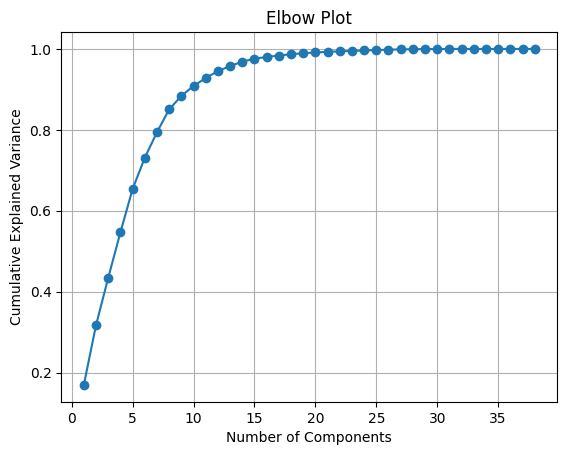

In [34]:
pca = PCA()
pca.fit(X_train_preprocessed)

# Calculate the cumulative explained variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio
plt.figure()
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Plot')
plt.grid()
plt.show()


In [35]:
# Create a PCA transformer with the optimal number of components
optimal_n_components = 15  
pca_transformer = PCA(n_components=optimal_n_components)

# Create a pipeline with the preprocessor, PCA, and the Ridge regression model
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca_transformer),
    ('regressor', Ridge())
])

# Train and evaluate the model
ridge_pipeline.fit(X_train, y_train)
y_pred_rg = ridge_pipeline.predict(X_test)



In [36]:
# Evaluate the model
mse_rg = mean_squared_error(y_test, y_pred_rg)
mae_rg = mean_absolute_error(y_test, y_pred_rg)
rmse_rg = np.sqrt(mse_rg)
r2_rg = r2_score(y_test, y_pred_rg)
print(f"Ridge Regression with PCA MSE: {mse_rg}")
print(f"Ridge Regression with PCA MAE: {mae_rg:.2f}")
print(f"Ridge Regression with PCA RMSE: {rmse_rg:.2f}")
print(f"Ridge Regression with PCA R2:{r2_rg:.2f}")

Ridge Regression with PCA MSE: 2923.8602608063184
Ridge Regression with PCA MAE: 35.81
Ridge Regression with PCA RMSE: 54.07
Ridge Regression with PCA R2:0.17


In [37]:
# Do the grid search for my model
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca_transformer),
    ('regressor', Ridge())
])

# Define the hyperparameter grid
param_grid = {'regressor__alpha': [0.1, 1, 10, 100]}

# Perform the grid search
grid_search = GridSearchCV(ridge_pipeline, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Evaluate the best model
y_pred_rgBest = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rgBest)
print(f"Ridge Regression with PCA and Grid Search Mean Squared Error: {mse}")



Best hyperparameters: {'regressor__alpha': 1}
Ridge Regression with PCA and Grid Search Mean Squared Error: 2923.860206446704
